<h1 style="text-align: center;">Variable PROVINCIA</h1>

Cargamos el DataSet

In [8]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_9.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION_LOG', 'MOROSIDAD'],
      dtype='object')

In [ ]:
dataset_work_3.shape

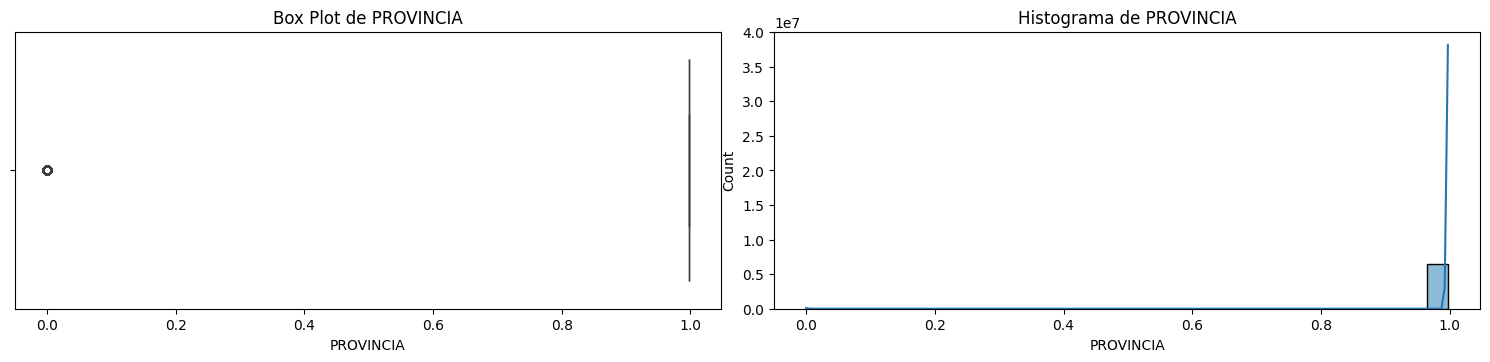

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['PROVINCIA'])
plt.title('Box Plot de PROVINCIA')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['PROVINCIA'], bins=30, kde=True)
plt.title('Histograma de PROVINCIA')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [10]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_3[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_3, 'PROVINCIA')
display(estadisticas_completas)

count        6.435903e+06
mean         9.946973e-01
std          5.130008e-02
min          3.107567e-07
25%          9.973444e-01
50%          9.973444e-01
75%          9.973444e-01
max          9.973444e-01
asimetria   -1.932795e+01
curtosis     3.715699e+02
varianza     2.631699e-03
Name: PROVINCIA, dtype: float64

In [11]:
# Lista de variables numéricas a analizar
variables = ['PROVINCIA']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

           Lower Bound  Number of Outliers  Upper Bound
PROVINCIA     0.997344             17091.0     0.997344



## Creamos la variable **UBICACION_LOC_COCIENTE**

In [12]:
import numpy as np

dataset_work_4 = dataset_work_3.copy()

# Cociente entre PROVINCIA y LOCALIDAD (ajustado para evitar división por 0)
dataset_work_4['UBICACION_LOC_COCIENTE'] =  (dataset_work_4['LOCALIDAD']) / (dataset_work_4['PROVINCIA'])

In [13]:
# Lista de variables numéricas a analizar
variables = ['PROVINCIA', 'UBICACION_LOC_COCIENTE']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                        Lower Bound  Upper Bound  Number of Outliers
PROVINCIA                  0.997344     0.997344             17091.0
UBICACION_LOC_COCIENTE    -0.594328     1.051587             17077.0


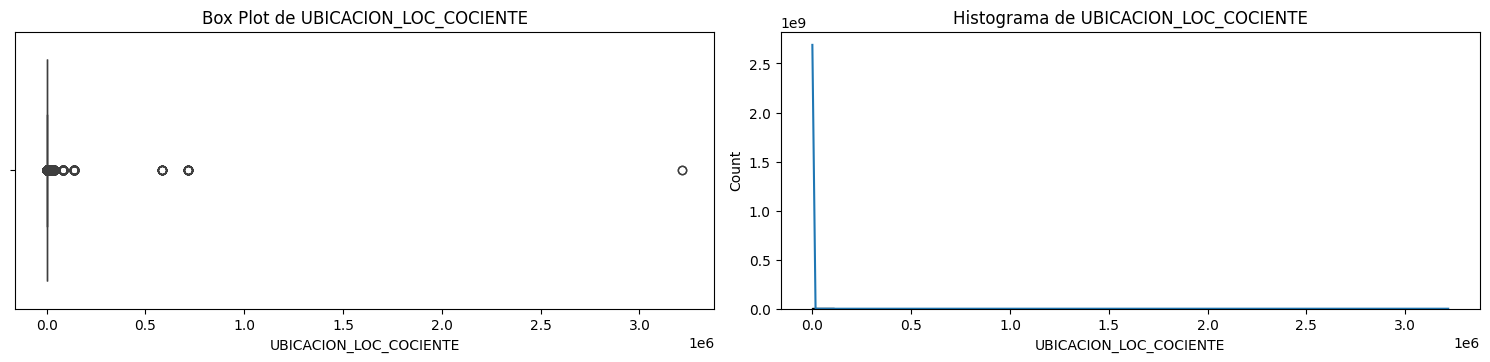

In [14]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['UBICACION_LOC_COCIENTE'])
plt.title('Box Plot de UBICACION_LOC_COCIENTE')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['UBICACION_LOC_COCIENTE'], bins=30, kde=True)
plt.title('Histograma de UBICACION_LOC_COCIENTE')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()


### Ordenamos las columnas

In [15]:
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION_LOG', 'MOROSIDAD',
       'UBICACION_LOC_COCIENTE'],
      dtype='object')

In [16]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'UBICACION_LOC_COCIENTE', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION_LOG', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_4 = dataset_work_4[columns_order]
# Mostrar el DataFrame reorganizado
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD',
       'UBICACION_LOC_COCIENTE', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD_YJ',
       'INFLACION_LOG', 'MOROSIDAD'],
      dtype='object')

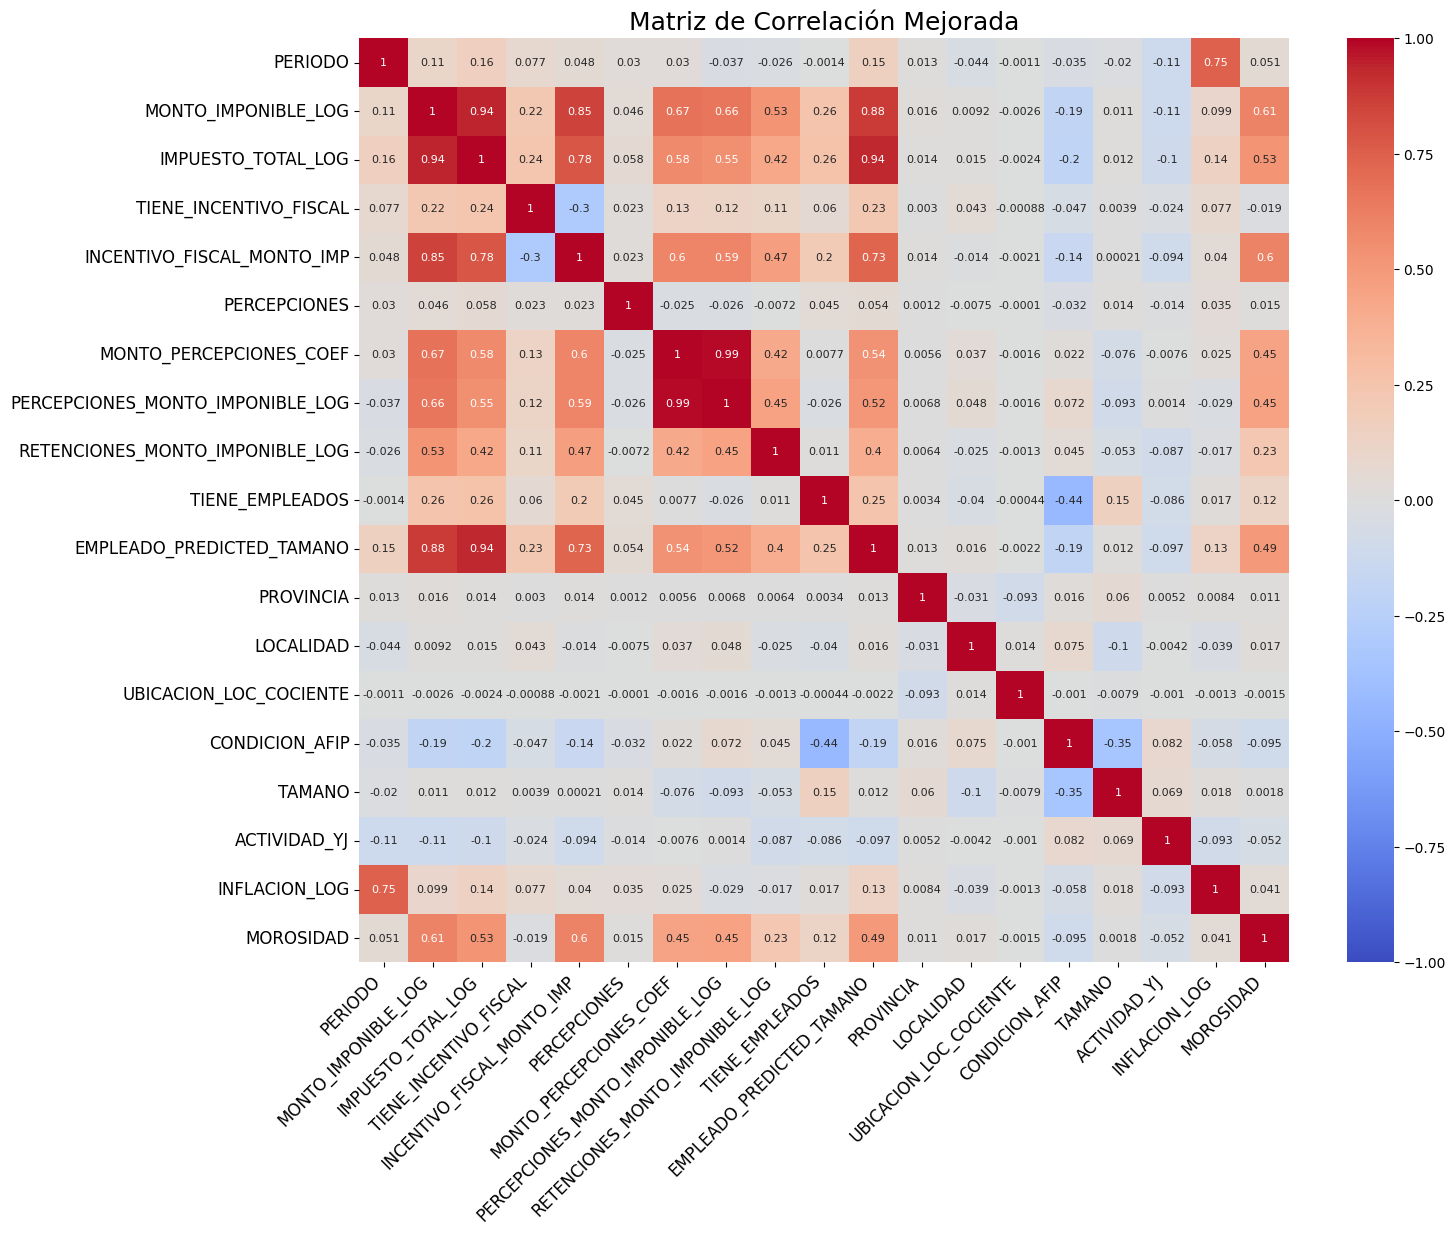

In [17]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_4.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [18]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_transformed.csv'
# Guarda el DataFrame en un archivo CSV
dataset_work_4.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_transformer.csv
